In [1]:
!pip install librosa


   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   -------------------- ------------------- 0.5/1.0 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 2.0 MB/s eta 0:00:00


In [25]:
import librosa
import librosa.display
import librosa.feature
import matplotlib.pyplot as plt

In [23]:
y, sr = librosa.load("voice sample.wav")

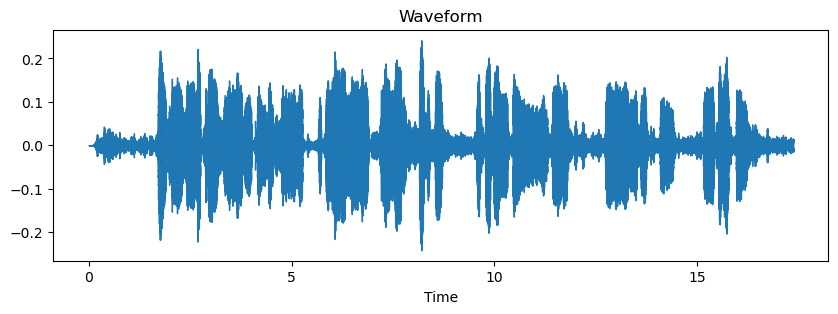

In [27]:
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.show()

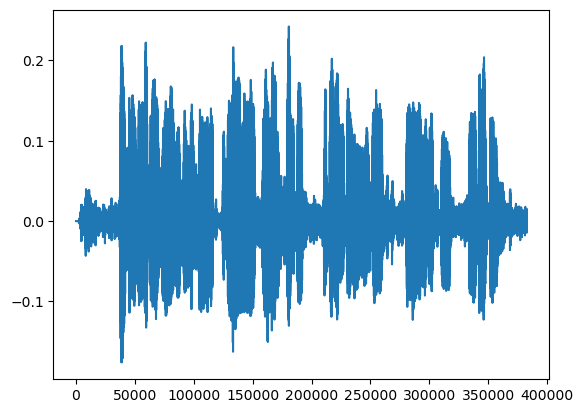

In [29]:
plt.plot(y)

In [37]:
data=y

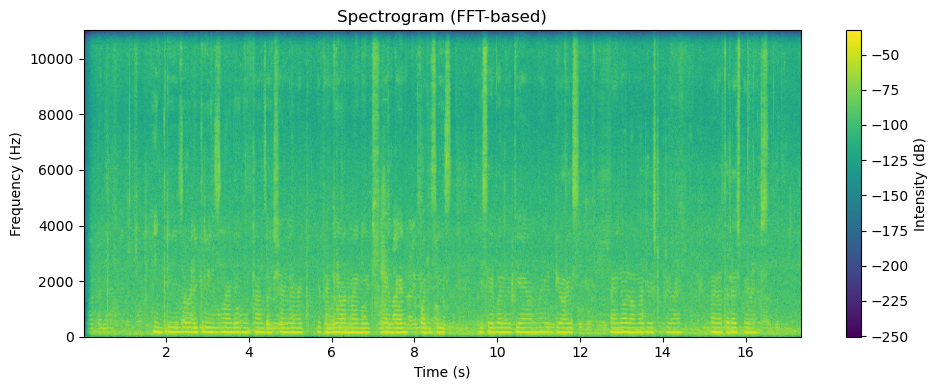

In [47]:
from scipy.io import wavfile
plt.figure(figsize=(10, 4))
plt.specgram(data, Fs=sr, NFFT=1024, noverlap=512)
plt.title("Spectrogram (FFT-based)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label='Intensity (dB)')
plt.tight_layout()
plt.show()

In [51]:
#mfcc, gfcc, spectral centroid ,pitch

In [67]:
!pip install gammatone

In [71]:
from scipy.stats import kurtosis, skew
from gammatone.gtgram import gtgram

def extract_audio_features(file_path):
    y, sr = librosa.load("voice sample.wav")

    # --- MFCC ---
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1)

    # --- GFCC (Gammatone) ---
    gt_spec = gtgram(y, sr, window_time=0.025, hop_time=0.010, channels=13, f_min=50)
    gfcc = librosa.feature.mfcc(S=librosa.power_to_db(gt_spec), n_mfcc=13)
    gfcc_mean = np.mean(gfcc, axis=1)

    # --- Spectral Centroid ---
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    centroid_mean = np.mean(centroid)

    # --- Pitch using pyin ---
    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=50, fmax=500, sr=sr)
    f0_clean = f0[~np.isnan(f0)]
    pitch_mean = np.mean(f0_clean) if f0_clean.size > 0 else 0
    pitch_min = np.min(f0_clean) if f0_clean.size > 0 else 0
    pitch_max = np.max(f0_clean) if f0_clean.size > 0 else 0

    return {
        'mfcc': mfcc_mean,
        'gfcc': gfcc_mean,
        'spectral_centroid': centroid_mean,
        'pitch_mean': pitch_mean,
        'pitch_min': pitch_min,
        'pitch_max': pitch_max
    }

features = extract_audio_features("harvard.wav")

print("MFCC:", features['mfcc'])
print("GFCC:", features['gfcc'])
print("Spectral Centroid:", features['spectral_centroid'])
print("Pitch (mean):", features['pitch_mean'])
print("Pitch (min):", features['pitch_min'])
print("Pitch (max):", features['pitch_max'])

MFCC: [-3.5640115e+02  1.2960757e+02  1.1193534e+01  2.9481497e+01
  5.7550135e+00  6.2602715e+00 -4.6111956e+00 -1.3501131e+01
 -2.2562485e-02 -8.0315256e+00 -5.4336653e+00 -6.6927433e+00
 -2.9812083e+00]
GFCC: [-114.19144741   16.12147288   -1.77855269   -1.34424699   -5.76585262
   -3.59127591   -4.48241889   -2.38214795   -4.06085898   -3.76759924
   -3.14246032   -1.82036584   -1.12284996]
Spectral Centroid: 1396.7845428467929
Pitch (mean): 159.67229643393236
Pitch (min): 113.55044290708773
Pitch (max): 205.86044732869837
